# Make Big Titles for main parts of this notebook : 
Create dataframes from source data
    Hopkins
    Italy
    Etc..
Plot source data
Calculate descriptive dataframes
    early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe
    early1k_countries = Earliest 1000 cases (country_name,date,number)
    early_highrate = Earliest highest rate (what date was the highest rate for each country) 
    etc...
Plot descriptive data

# Create DFD a DataFrame of deceased from Hopkins data

In [23]:
# -*- coding: utf-8 -*-
"""
Plot rates of changes per day and per country froo the COVID epidemic
Created on Thu Apr 23 00:03:57 2020
@author: pmannoni
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfd=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfd.columns= colnames # Set new column names to df dataframe
dfd=dfd.drop(dfd.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfd.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfd

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,Burundi,Sierra Leone,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create DFC a DataFrame of confirmed from Hopkins data

In [142]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnames # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfc

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,Burundi,Sierra Leone,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


# Create DFR a DataFrame of recovered from Hopkins data

In [143]:
covid=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#print(covid)

# =========Convert data from github into a dataframe with dates as index and countries/province as column names
dfc=covid.T # transpose covid dataframe into df dataframe
countries=list(covid['Country/Region']) # create a list 'countries' of countries from the column 'Country/Region' in covid
province=list(covid['Province/State']) # create a list of 'province' from the column 'Province/State' in covid
colnames= [i if str(j)=='nan' else i+'/'+j  for i, j in zip(countries, province)] # create a list by concatenating countries names and "/" and province names
dfc.columns= colnames # Set new column names to df dataframe
dfc=dfc.drop(dfc.index[[0,1,2,3]]) # remove the first 4 lines of df with country, province, lat,long
dfc.index=pd.to_datetime(dfd.index, format='%m/%d/%y') # set new index with date as datetime64[ns] format
dfc

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia/Australian Capital Territory,Australia/New South Wales,...,Burundi,Sierra Leone,"Netherlands/Bonaire, Sint Eustatius and Saba",Malawi,United Kingdom/Falkland Islands (Malvinas),France/Saint Pierre and Miquelon,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


# create IDFD,IDFC,IDFR from Italian government regional file

# Select countries

In [100]:
dfd['France'].loc[dfd.index > '2020-02-28']  

2020-02-29        2
2020-03-01        2
2020-03-02        3
2020-03-03        4
2020-03-04        4
2020-03-05        6
2020-03-06        9
2020-03-07       11
2020-03-08       19
2020-03-09       19
2020-03-10       33
2020-03-11       48
2020-03-12       48
2020-03-13       79
2020-03-14       91
2020-03-15       91
2020-03-16      148
2020-03-17      148
2020-03-18      148
2020-03-19      243
2020-03-20      450
2020-03-21      562
2020-03-22      674
2020-03-23      860
2020-03-24     1100
2020-03-25     1331
2020-03-26     1696
2020-03-27     1995
2020-03-28     2314
2020-03-29     2606
2020-03-30     3024
2020-03-31     3523
2020-04-01     4403
2020-04-02     5387
2020-04-03     6507
2020-04-04     7560
2020-04-05     8078
2020-04-06     8911
2020-04-07    10328
2020-04-08    10869
2020-04-09    12210
2020-04-10    13197
2020-04-11    13832
2020-04-12    14393
2020-04-13    14967
2020-04-14    15729
2020-04-15    17167
2020-04-16    17920
2020-04-17    18681
2020-04-18    19323


In [24]:
mcountries=['France','Italy','Spain','Tanzania','Sweden','Portugal','Poland','Brazil','South Africa'] #,'US']
colnames

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia/Australian Capital Territory',
 'Australia/New South Wales',
 'Australia/Northern Territory',
 'Australia/Queensland',
 'Australia/South Australia',
 'Australia/Tasmania',
 'Australia/Victoria',
 'Australia/Western Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada/Alberta',
 'Canada/British Columbia',
 'Canada/Grand Princess',
 'Canada/Manitoba',
 'Canada/New Brunswick',
 'Canada/Newfoundland and Labrador',
 'Canada/Nova Scotia',
 'Canada/Ontario',
 'Canada/Prince Edward Island',
 'Canada/Quebec',
 'Canada/Saskatchewan',
 'Central African Republic',
 'Chad',
 'Chile',
 'China/Anhui',
 'China/Beijing',
 'China/Chongqing',
 'China/Fujian',
 '

   # Plot dfd of selected countries

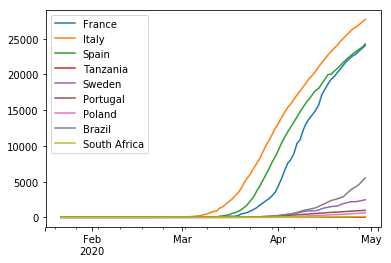

In [26]:
#  plot selected column with specific names of countries 
dfd[mcountries].plot()

# Plot dfc of selected countries

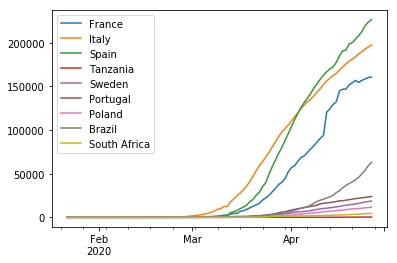

In [147]:
#  plot selected column with specific names of countries 
dfc[mcountries].plot()

# Create dfd and dfc with rates (rates must be calculated with non cumulative data)

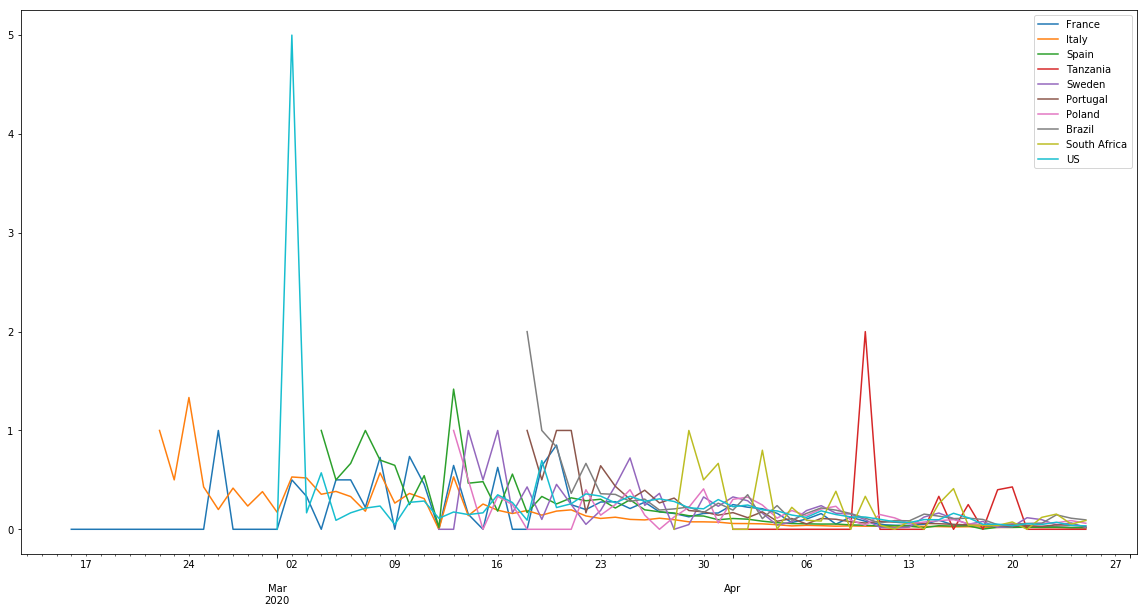

In [85]:
dfdr=dfd.pct_change(periods=1)
#dfdr
dfdr[mcountries].plot(legend=True,figsize=(20,10) )


In [99]:
#dfd['US'].loc[dfd.index > '2020-03-20']  
#dfdr['US'].loc[dfdr.index > '2020-03-20']  
dfdr['France'].loc[dfdr.index > '2020-02-28']


2020-02-29    0.000000
2020-03-01    0.000000
2020-03-02    0.500000
2020-03-03    0.333333
2020-03-04    0.000000
2020-03-05    0.500000
2020-03-06    0.500000
2020-03-07    0.222222
2020-03-08    0.727273
2020-03-09    0.000000
2020-03-10    0.736842
2020-03-11    0.454545
2020-03-12    0.000000
2020-03-13    0.645833
2020-03-14    0.151899
2020-03-15    0.000000
2020-03-16    0.626374
2020-03-17    0.000000
2020-03-18    0.000000
2020-03-19    0.641892
2020-03-20    0.851852
2020-03-21    0.248889
2020-03-22    0.199288
2020-03-23    0.275964
2020-03-24    0.279070
2020-03-25    0.210000
2020-03-26    0.274230
2020-03-27    0.176297
2020-03-28    0.159900
2020-03-29    0.126188
2020-03-30    0.160399
2020-03-31    0.165013
2020-04-01    0.249787
2020-04-02    0.223484
2020-04-03    0.207908
2020-04-04    0.161826
2020-04-05    0.068519
2020-04-06    0.103120
2020-04-07    0.159017
2020-04-08    0.052382
2020-04-09    0.123378
2020-04-10    0.080835
2020-04-11    0.048117
2020-04-12 

# Make code to sort countries by 
Earliest epidemic start : 
Earliest rate down
Earliest highest rate
Earliest diminishing rate
Strongest diminishiong rates
Richest 
poorest
number of inhabitants
é
# Make code to select the top 20

# Create lists of countries (dfd,dfc,dfr):
early_countries = Earliest epidemic start (country_name,date,number) sorted by date and stored in dataframe

early1k_countries = Earliest 1000 cases (country_name,date,number)

early_highrate = Earliest highest rate (what date was the highest rate for each country) 



# Create
dataframe where index is number of days since 100th case for all countries 


In [137]:
for c in colnames:
    print(c,dfd[c][dfd[c]!=0].index[0],dfd[c][dfd[c]!=0].iloc[0])

Afghanistan 2020-03-22 00:00:00 1
Albania 2020-03-11 00:00:00 1
Algeria 2020-03-12 00:00:00 1
Andorra 2020-03-22 00:00:00 1
Angola 2020-03-29 00:00:00 2
Antigua and Barbuda 2020-04-07 00:00:00 1
Argentina 2020-03-08 00:00:00 1
Armenia 2020-03-26 00:00:00 1
Australia/Australian Capital Territory 2020-03-30 00:00:00 1
Australia/New South Wales 2020-03-04 00:00:00 1


IndexError: index 0 is out of bounds for axis 0 with size 0

# Load file with confinement dates for each country

# Plot evolution with a line and circles where confinement started
